<a href="https://colab.research.google.com/github/rodgersxy/Web-Scraping/blob/main/carscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
website = 'https://www.cars.com/shopping/results/?stock_type=all&makes%5B%5D=mercedes_benz&models%5B%5D=&zip='
response = requests.get(website)
print(response.status_code)


200


In [3]:
soup = BeautifulSoup(response.content, 'html.parser')
results = soup.find_all('div', class_='vehicle-card')
print(len(results))

21


In [4]:
# Initialize lists to store data
name, mileage, dealer_name, rating, rating_count, price = [], [], [], [], [], []
# Extract data from each vehicle card
for result in results:

    # name
    try:
        name.append(result.find('h2').get_text())
    except:
        name.append('NULL')

    # mileage
    try:
        mileage.append(result.find('div', {'class' : 'mileage'}).get_text())
    except:
        mileage.append('NULL')

    # dealer name
    try:
        dealer_name.append(result.find('div', {'class' : 'dealer-name'}).get_text().strip())
    except:
        dealer_name.append('NULL')

    # rating
    try:
        rating.append(result.find('span', {'class' :'sds-rating__count'}).get_text())
    except:
        rating.append('NULL')

    # rating count
    try:
        rating_count.append(result.find('span', {'class' :'test1 sds-rating__link sds-button-link'}).get_text())
    except:
        rating_count.append('NULL')

    # price
    try:
        price.append(result.find('span', {'class' :'primary-price'}).get_text())
    except:
        price.append('NULL')

# Create a DataFrame from the extracted data
car_dealer = pd.DataFrame({'Name': name, 'Mileage': mileage, 'Dealer Name': dealer_name, 'Rating': rating,
                           'Rating Count': rating_count, 'Price': price})

In [5]:
# Data Cleaning
car_dealer['Rating Count'] = car_dealer['Rating Count'].str.extract(r'(\d+)').astype(float)
# Replace non-numeric values with NaN
car_dealer['Price'] = car_dealer['Price'].str.replace('$', '').str.replace(',', '')
car_dealer['Price'] = pd.to_numeric(car_dealer['Price'], errors='coerce')
car_dealer['Price'] = car_dealer['Price'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

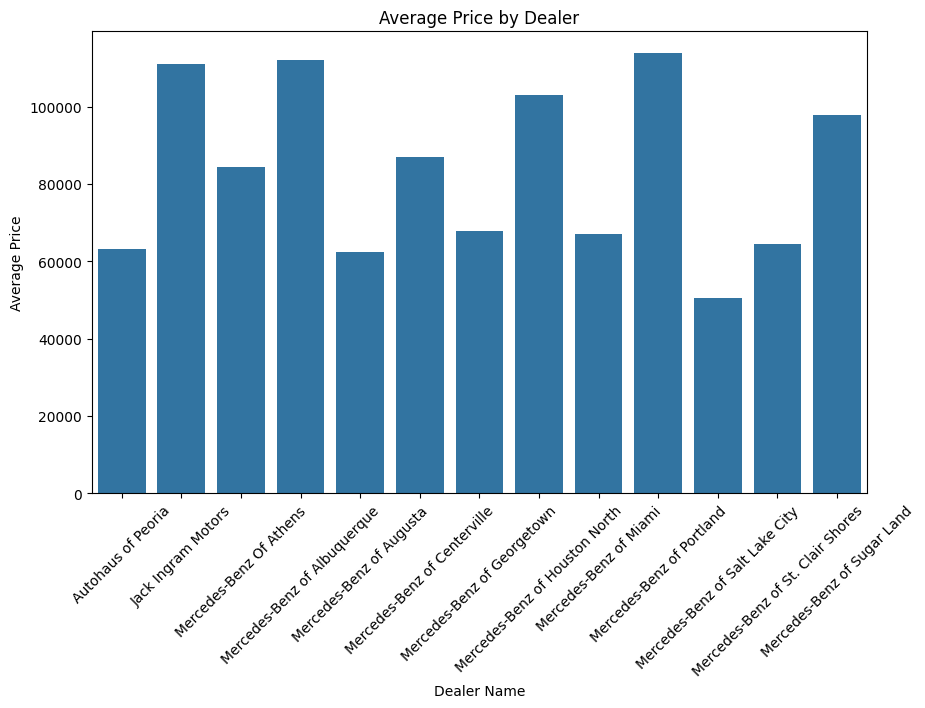

In [6]:
# Average Price by Dealer
avg_price_by_dealer = car_dealer.groupby('Dealer Name')['Price'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_dealer.index, y=avg_price_by_dealer.values)
plt.xticks(rotation=45)
plt.title('Average Price by Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price')
plt.show()

In [11]:
# Check the unique values in the Mileage column
unique_values = car_dealer['Mileage'].unique()

# Print the unique values
print(unique_values)

['NULL']


In [12]:
# Replace "NULL" values with NaN
car_dealer['Mileage'].replace("NULL", np.nan, inplace=True)

# Convert the Mileage column to a numeric data type
car_dealer['Mileage'] = pd.to_numeric(car_dealer['Mileage'])

# Calculate the correlation between Mileage and Price
correlation = car_dealer['Mileage'].corr(car_dealer['Price'])

# Print the correlation
print(f'Correlation between Mileage and Price: {correlation}')

Correlation between Mileage and Price: nan


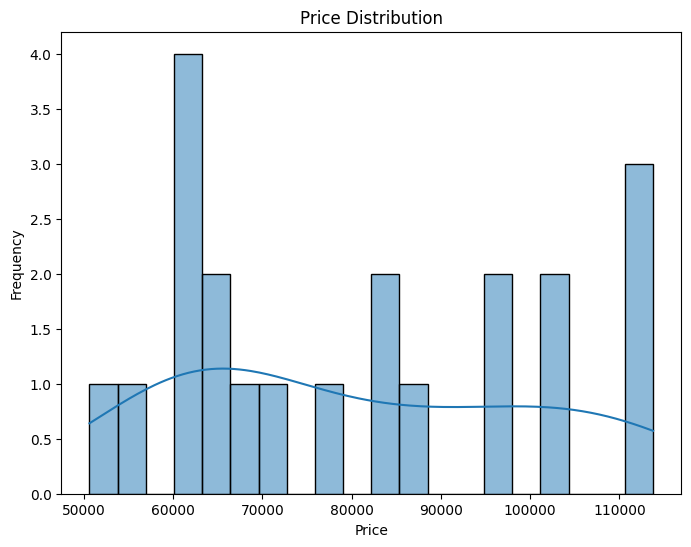

In [13]:
# Price Distribution
plt.figure(figsize=(8, 6))
sns.histplot(car_dealer['Price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


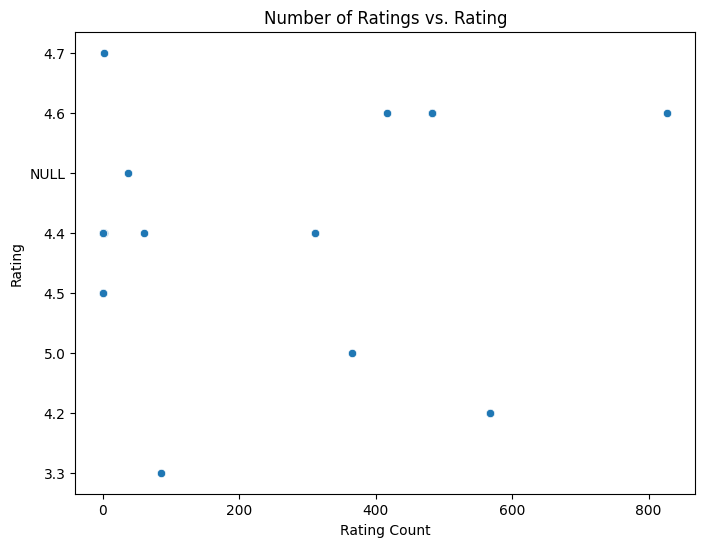

In [14]:
# Number of Ratings vs. Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x=car_dealer['Rating Count'], y=car_dealer['Rating'])
plt.title('Number of Ratings vs. Rating')
plt.xlabel('Rating Count')
plt.ylabel('Rating')
plt.show()

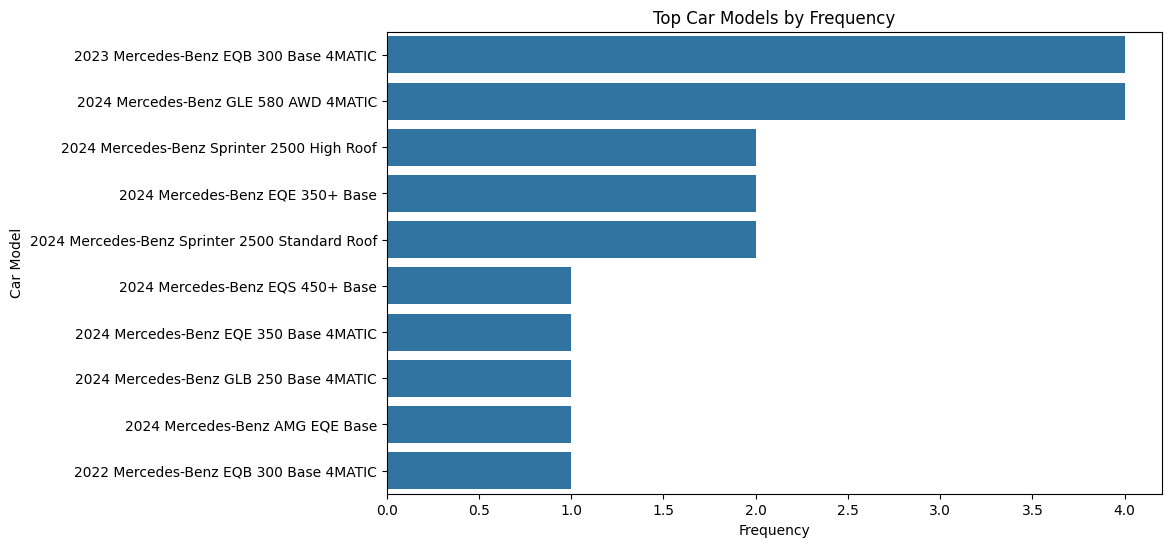

In [15]:
# Top Models by Frequency
top_models = car_dealer['Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_models.values, y=top_models.index)
plt.title('Top Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.show()

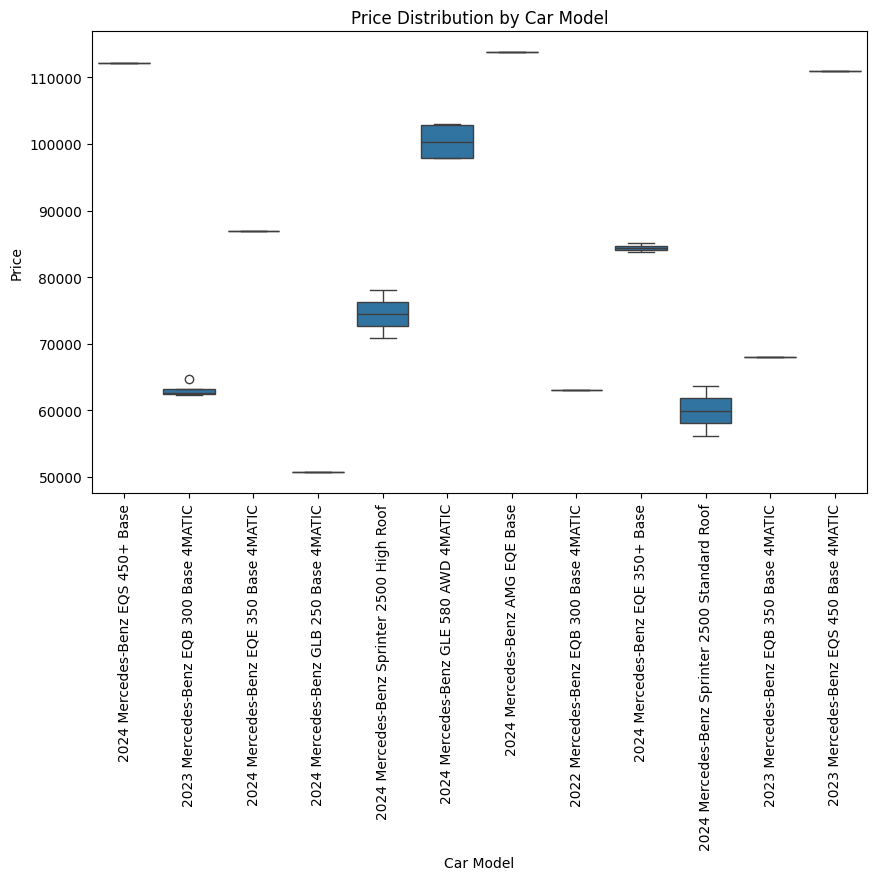

In [16]:
# Price Distribution by Car Model
plt.figure(figsize=(10, 6))
sns.boxplot(x='Name', y='Price', data=car_dealer)
plt.xticks(rotation=90)
plt.title('Price Distribution by Car Model')
plt.xlabel('Car Model')
plt.ylabel('Price')
plt.show()

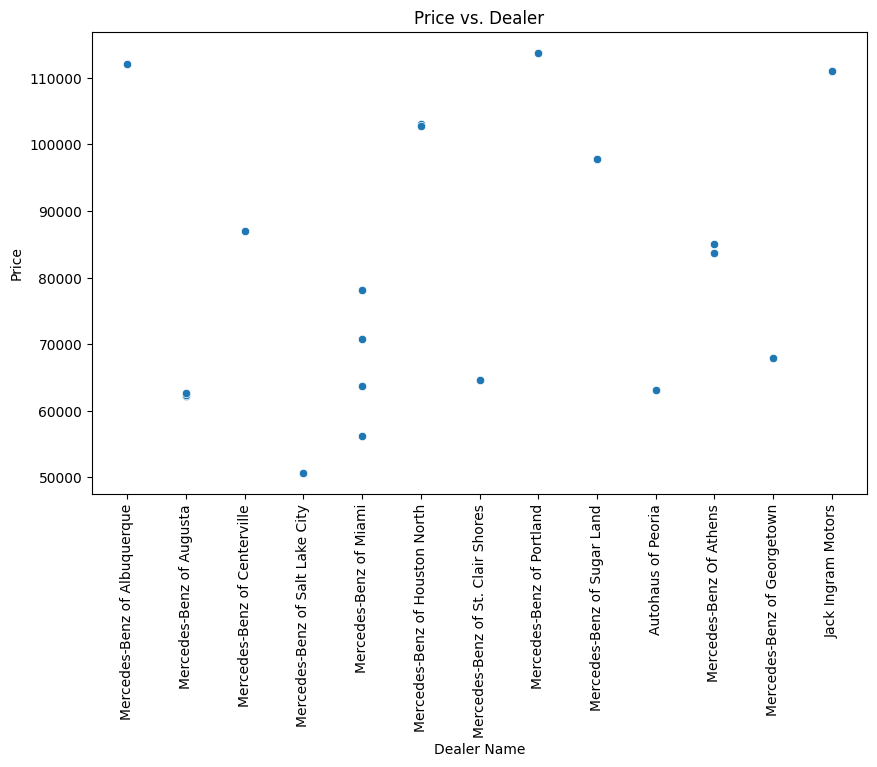

In [17]:
# Price vs. Dealer Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dealer Name', y='Price', data=car_dealer)
plt.xticks(rotation=90)
plt.title('Price vs. Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Price')
plt.show()

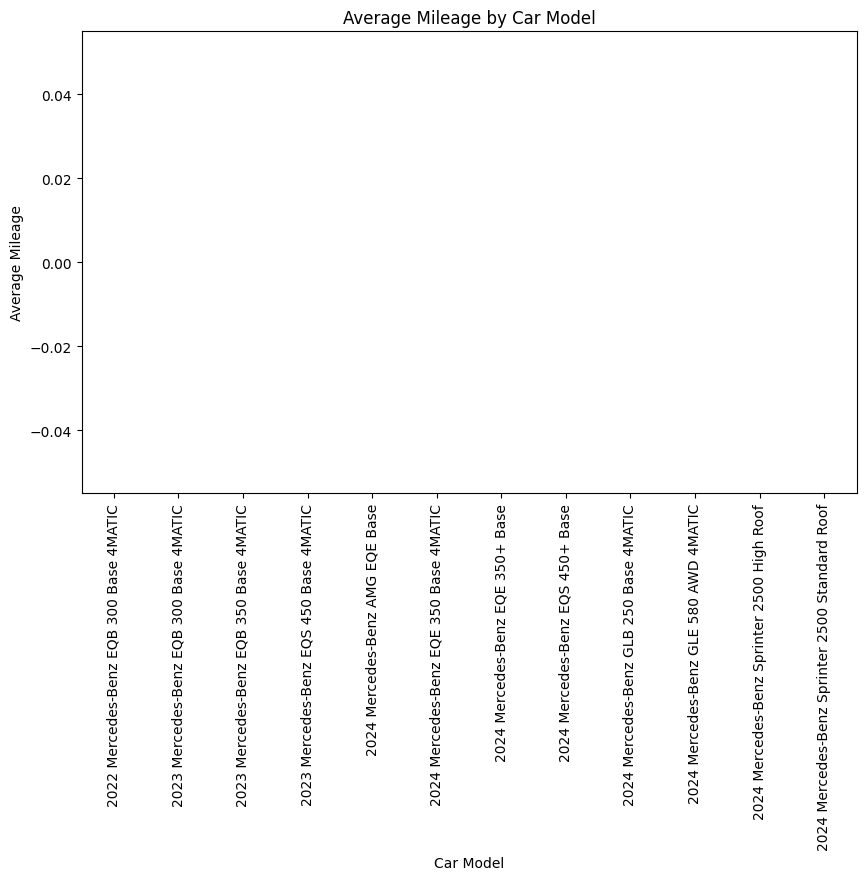

In [18]:
# Average Mileage by Car Model
average_mileage_by_model = car_dealer.groupby('Name')['Mileage'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=average_mileage_by_model.index, y=average_mileage_by_model.values)
plt.xticks(rotation=90)
plt.title('Average Mileage by Car Model')
plt.xlabel('Car Model')
plt.ylabel('Average Mileage')
plt.show()

In [19]:
# Create a directory named 'data' if it doesn't exist
data_dir = 'data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Specify the path to the Excel file in the 'data' folder
excel_file_path = os.path.join(data_dir, 'car_data.xlsx')

# Save the DataFrame to an Excel file
car_dealer.to_excel(excel_file_path, index=False)